In [45]:
import sys
import math
import os
from matplotlib import pyplot as plt
import time
import random

# Node

In [46]:
# A binary tree node has data, pointer to left child
# and a pointer to right child
class Node:
    def __init__(self,data):
        self.data=data
        self.left=None
        self.right=None

# Tree Balancer

storeBSTNodes(root, nodes): This function traverses the given BST in an inorder manner and stores its nodes pointers in the nodes vector in sorted order.

buildTreeUtil(nodes, start, end): This is a recursive function that constructs a balanced BST from the nodes vector. It takes the starting and ending indices of the nodes vector and returns the root of the balanced BST.

buildTree(root): This is the main function that converts the unbalanced BST into a balanced BST. It first stores the nodes of the given BST in the nodes vector using the storeBSTNodes function, and then constructs a new BST from the nodes vector using the buildTreeUtil function.

In [47]:
def storeBSTNodes(root,nodes):
    
    if not root:
        return
    
    storeBSTNodes(root.left,nodes)
    nodes.append(root)
    storeBSTNodes(root.right,nodes)

def buildTreeUtil(nodes,start,end):

    if start>end:
        return None

    mid=(start+end)//2
    node=nodes[mid]

    node.left=buildTreeUtil(nodes,start,mid-1)
    node.right=buildTreeUtil(nodes,mid+1,end)
    return node

def buildTree(root):
    
    nodes=[]
    storeBSTNodes(root,nodes)

    n=len(nodes)
    return buildTreeUtil(nodes,0,n-1)

# DFS

## - Inorder

The function takes a root node of a binary tree and a list of search values as input. It first checks if the root node exists, and if so, recursively calls itself on the left child of the current node. Then it checks if the data of the current node is in the searchValues list, and if so, it prints the node's data. The variable found is incremented to keep track of the number of found values. If found reaches 5, the function returns without continuing to traverse the rest of the tree. Finally, the function recursively calls itself on the right child of the current node.

In [48]:
def inOrder(root, searchValues):
    found = 0
    if root:
        if found == 5:
            return
        inOrder(root.left, searchValues)
        if root.data in searchValues:
            found += 1
            print(root.data, end=" ")
        inOrder(root.right, searchValues)

# BFS

This code implements a function called levelOrder which takes a root node of a binary tree and a list of search values as input, and prints out the nodes in the tree in level order. The height function computes the height of the tree, and the printCurrentLevel function prints the nodes at the current level of the tree.

The printCurrentLevel function takes the root of the tree and a level as input. It recursively traverses the tree and prints the nodes at the given level, using a counter variable called foundBFS to keep track of the number of nodes that have been printed so far. If a node's data is in the searchValues list, it is printed and foundBFS is incremented. The function stops printing nodes if foundBFS reaches a value of 5.

In [61]:
def levelOrder(root, searchValues):
    found = 0
    # Base Case
    if root is None:
        return
 
    # Create an empty queue
    # for level order traversal
    queue = []
 
    # Enqueue Root and initialize height
    queue.append(root)
 
    while(len(queue) > 0):
 
        # Print front of queue and
        # remove it from queue
#         print(queue[0].data, end = " ")
        if queue[0].data in searchValues:
            found += 1
            if found >= 5:
                return
        node = queue.pop(0)
 
        # Enqueue left child
        if node.left is not None:
            queue.append(node.left)
 
        # Enqueue right child
        if node.right is not None:
            queue.append(node.right)
 

## Tree generator

I generate the trees by using an list of litsts, I create the list of lists randomly using a probability variable so that the tree doesn't get generated balanced. Then, I insert the root as the fist list. Then, I iterate over the list of lists and connect those nodes

In [52]:
def treeGenerator(root, depth):
    possibleNodes = []
#     newNodeIndex = 0

    for i in range(100000):
        possibleNodes.append(i)
    
    length = 2
    treee = []
    probability = 80
    for i in range(depth):
        level = []
        i = 0
        for i in range(length):
            if random.randint(0,100) <= probability:
#                 newNodeIndex = random.randint(0,len(possibleNodes))
                newNode = random.choice(possibleNodes)
#                 level.append(Node(possibleNodes[newNodeIndex]))
                level.append(Node(newNode))
                possibleNodes.remove(newNode)
        length = 2 * len(level)
        treee.append(level)

    treee.insert(0, [root])

    for i in range(len(treee)):
        k = 0
        for j in range(len(treee[i])):
            if i >= len(treee)-1:
                break
            treee[i][j].left = treee[i+1][k]
            if k >= len(treee[i+1])-1:
                break
            if treee[i+1][k+1] != None:
                k += 1
                treee[i][j].right = treee[i+1][k]
            if k >= len(treee[i+1])-1:
                break
            k += 1
    
    return treee

## Tree visualizer

I print the tree in a format that is used by Graphiz

In [53]:
def visualizeTree(tree):
    for r in tree:
        for c in r:
            if (c.left != None):
                print (str(c.data) + " -> " + str(c.left.data))
            if (c.right != None):
                print (str(c.data) + " -> " + str(c.right.data))

## Length of tree

In [54]:
def lengthOfTree(tree):
    length = 0
    for r in tree:
        for c in r:
            length += 1
    return length

## Generate random values to look for

I pick random nodes from the tree to look for during the time test

In [12]:
def generateValuesToFind(tree):
    values = []
    toFind = []
    for r in tree:
        for c in r:
            values.append(c.data)
    
    for i in range(5):
        toFind.append(values[random.randint(0, len(values))])
        
    return toFind

# Main

In [64]:
timesDFS = []
balancedTimesDFS = []
timesBFS = []
balancedTimesBFS = []
variants = [5, 10, 15, 17, 20]

for i in variants:
    root = Node(random.randint(0,100))
    tree = treeGenerator(root, i)
    searchValues = generateValuesToFind(tree)
    #check DFS on unbalanced trees
    start = time.time()
    inOrder(root, searchValues)
    end = time.time()
    timesDFS.append(end-start)
    #check BFS on balanced trees
    start = time.time()
    foundBFS = 0
    levelOrder(root, searchValues)
    end = time.time()
    timesBFS.append(end-start)
    #balance the trees
    buildTree(root)
    #DFS
    start = time.time()
    inOrder(root, searchValues)
    end = time.time()
    balancedTimesDFS.append(end-start)
    #BFS
    start = time.time()
    levelOrder(root, searchValues)
    end = time.time()
    balancedTimesBFS.append(end-start)

90071 67188 27077 26946 33520 8408 81505 14613 27692 83555 63469 69733 51156 13128 80674 84779 4834 49167 71046 52079 712 8413 77838 34101 

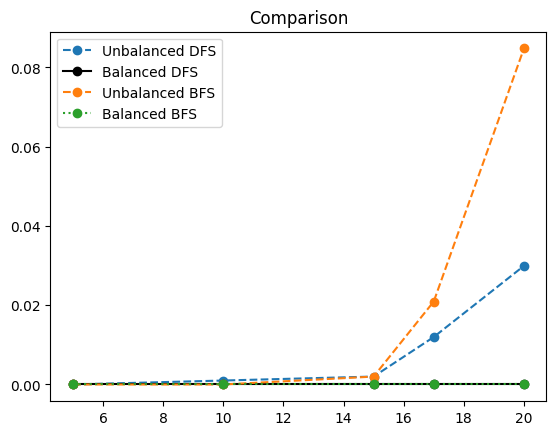

In [65]:
plt.plot(variants, timesDFS, '--o', label = 'Unbalanced DFS')
plt.plot(variants, balancedTimesDFS, 'k-o', label = 'Balanced DFS')
plt.plot(variants, timesBFS, '--o', label = 'Unbalanced BFS')
plt.plot(variants, balancedTimesBFS, ':o', label = 'Balanced BFS')
plt.title('Comparison')
plt.legend()
plt.show()

# Conclusion

The speed of DFS (depth-first search) and BFS (breadth-first search) traversal of a graph or tree can vary depending on the structure of the graph or tree and the specific algorithm used to implement the traversal.

In general, BFS tends to be faster than DFS for finding the shortest path between two nodes in a graph, as it explores nodes in order of their distance from the starting node. BFS can also be more efficient than DFS for searching a graph with a high branching factor, as it explores nodes at each depth level before moving on to deeper levels.

However, in some cases, DFS may be faster than BFS. For example, if the graph is very deep and the solution is located near the bottom, DFS can reach the solution more quickly than BFS. Additionally, DFS can be more memory-efficient than BFS, as it only needs to store the path to the current node in the call stack, whereas BFS requires a queue to store all the nodes at each level.

Ultimately, the choice between DFS and BFS depends on the specific problem being solved and the characteristics of the graph or tree being traversed.

Usually DFS uses a stack, but because I use binary trees, the DFS doesn't have to use a stack and tends to be faster in this specific instance

DFS (depth-first search) for binary trees is typically faster than DFS for general graphs because binary trees have a well-defined structure that allows for more efficient traversal. Specifically, binary trees have a maximum of two child nodes per parent node, which means that the traversal can proceed in a more organized and predictable manner.

In a binary tree, DFS can be implemented recursively by traversing the left and right subtrees of each node in turn. This approach ensures that every node is visited exactly once, and the traversal can be completed in O(n) time, where n is the number of nodes in the tree.

In contrast, DFS for general graphs can be more complex and less efficient, as the graph may have cycles or disconnected components that require additional logic to handle. DFS on a graph can visit the same node multiple times, which can lead to an exponential number of paths being explored, making it less efficient than BFS in some cases.

Furthermore, a binary tree can be efficiently traversed using iterative DFS, which avoids the overhead of recursive function calls. In contrast, iterative DFS on a graph requires more complex data structures such as a stack or a visited set to keep track of visited nodes and the traversal path.

Overall, the structure of binary trees allows for more efficient and straightforward implementation of DFS compared to general graphs, which is why DFS for binary trees is typically faster than for graphs.